### Linear Regression Model

Mean Squared Error: 0.060
R² Score: 0.606


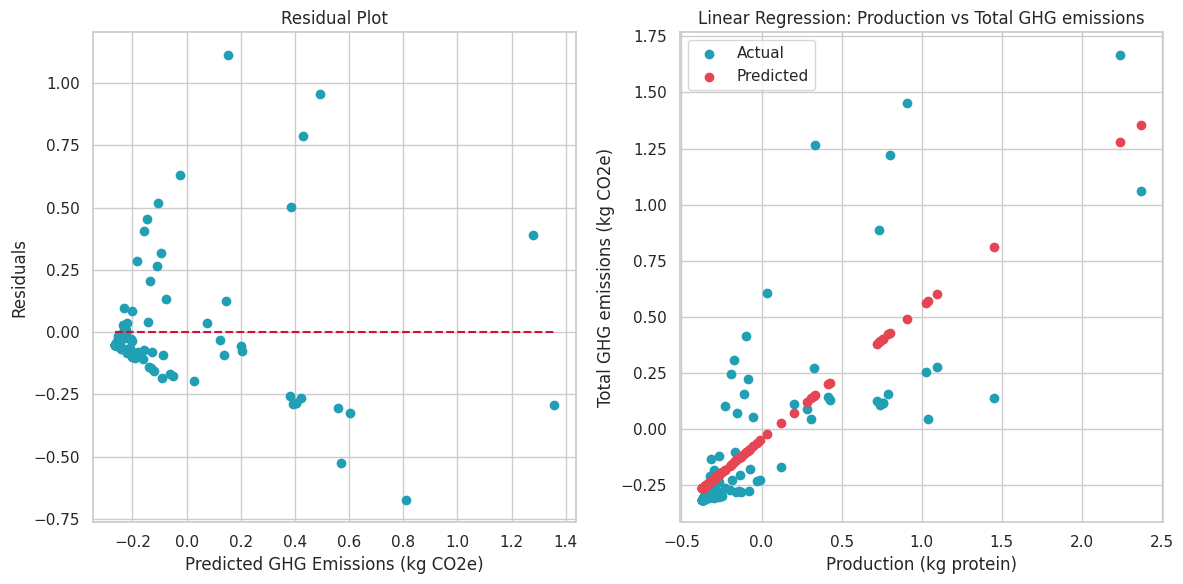

Mean Cross-Validation MSE: 0.077


In [4]:
# Linear Regression Model
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt

df = pd.read_csv('../data/GLEAM_LivestockEmissions.csv')

df = df[['Production (kg protein)', 'Total GHG emissions (kg CO2e)']]

df = df.dropna()

scaler = MinMaxScaler() 
df[['Production (kg protein)', 'Total GHG emissions (kg CO2e)']] = scaler.fit_transform(df[['Production (kg protein)', 'Total GHG emissions (kg CO2e)']])

standardizer = StandardScaler()
df[['Production (kg protein)', 'Total GHG emissions (kg CO2e)']] = standardizer.fit_transform(df[['Production (kg protein)', 'Total GHG emissions (kg CO2e)']])

from scipy import stats
z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]

X = df[['Production (kg protein)']]
y = df['Total GHG emissions (kg CO2e)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model = LinearRegression()
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error: {mse:.3f}")
print(f"R² Score: {r2:.3f}")

residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred, residuals, color='#209fb5')
plt.hlines(y=0, xmin=y_pred.min(), xmax=y_pred.max(), colors='#d20f39', linestyles='dashed')
plt.xlabel('Predicted GHG Emissions (kg CO2e)')
plt.ylabel('Residuals')
plt.title('Residual Plot')

# Plot actual vs predicted values
plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='#209fb5', label='Actual')
plt.scatter(X_test, y_pred, color='#e64553', label='Predicted')
plt.xlabel('Production (kg protein)')
plt.ylabel('Total GHG emissions (kg CO2e)')
plt.title('Linear Regression: Production vs Total GHG emissions')
plt.legend()

plt.tight_layout()
plt.show()

# Cross-Validation
cv_scores = cross_val_score(model, X, y, cv=5, scoring='neg_mean_squared_error')
mean_cv_score = -cv_scores.mean()  # Negate to get positive MSE
print(f"Mean Cross-Validation MSE: {mean_cv_score:.3f}")


### SVR, KNN and Ploynomial Regression Models for Comparision with Linear Regression


----------------------------------------------------------------
    
Support Vector Regression MSE: 0.077
R² Score (Support Vector Regression): 0.498

----------------------------------------------------------------
    
K-Nearest Neighbors Regression MSE: 0.080
R² Score (K-Nearest Neighbors Regression): 0.476

----------------------------------------------------------------
    
Polynomial Regression MSE: 0.066
R² Score (Polynomial Regression): 0.567


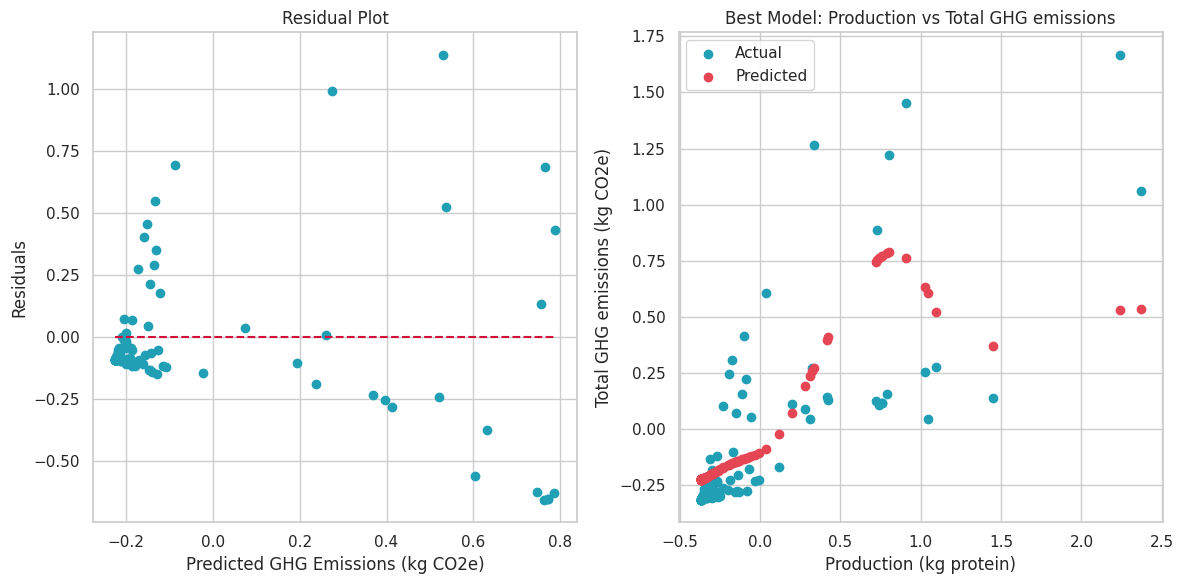

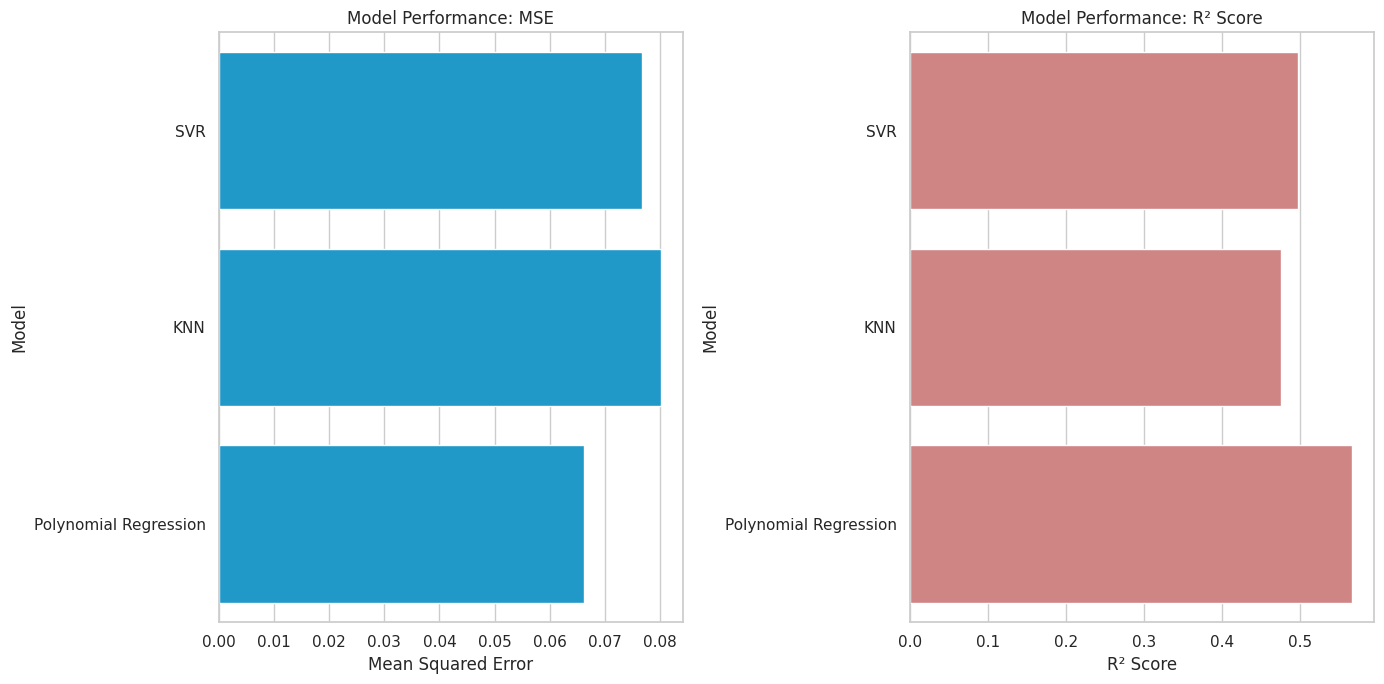

In [5]:
# SVR, KNN and Ploynomial Regression Models for Comparision with Linear Regression
import pandas as pd
import numpy as np
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler, PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from scipy import stats
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('../data/GLEAM_LivestockEmissions.csv')
df = df[['Production (kg protein)', 'Total GHG emissions (kg CO2e)']]
df = df.dropna()

scaler = MinMaxScaler()
df[['Production (kg protein)', 'Total GHG emissions (kg CO2e)']] = scaler.fit_transform(df[['Production (kg protein)', 'Total GHG emissions (kg CO2e)']])

standardizer = StandardScaler()
df[['Production (kg protein)', 'Total GHG emissions (kg CO2e)']] = standardizer.fit_transform(df[['Production (kg protein)', 'Total GHG emissions (kg CO2e)']])

z_scores = np.abs(stats.zscore(df))
df = df[(z_scores < 3).all(axis=1)]

X = df[['Production (kg protein)']]
y = df['Total GHG emissions (kg CO2e)']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Support Vector Regression
svr_model = SVR(kernel='rbf')
svr_model.fit(X_train, y_train)
y_pred_svr = svr_model.predict(X_test)
mse_svr = mean_squared_error(y_test, y_pred_svr)
r2_svr = r2_score(y_test, y_pred_svr)
print("""
----------------------------------------------------------------
    """)
print(f"Support Vector Regression MSE: {mse_svr:.3f}")
print(f"R² Score (Support Vector Regression): {r2_svr:.3f}")

# K-Nearest Neighbors Regression
knn_model = KNeighborsRegressor(n_neighbors=5)
knn_model.fit(X_train, y_train)
y_pred_knn = knn_model.predict(X_test)
mse_knn = mean_squared_error(y_test, y_pred_knn)
r2_knn = r2_score(y_test, y_pred_knn)
print("""
----------------------------------------------------------------
    """)
print(f"K-Nearest Neighbors Regression MSE: {mse_knn:.3f}")
print(f"R² Score (K-Nearest Neighbors Regression): {r2_knn:.3f}")

# Polynomial Features (for comparison)
poly = PolynomialFeatures(degree=2, include_bias=False)
X_poly = poly.fit_transform(X)
X_train_poly, X_test_poly, y_train, y_test = train_test_split(X_poly, y, test_size=0.2, random_state=42)

model_poly = LinearRegression()
model_poly.fit(X_train_poly, y_train)
y_pred_poly = model_poly.predict(X_test_poly)
mse_poly = mean_squared_error(y_test, y_pred_poly)
r2_poly = r2_score(y_test, y_pred_poly)
print("""
----------------------------------------------------------------
    """)
print(f"Polynomial Regression MSE: {mse_poly:.3f}")
print(f"R² Score (Polynomial Regression): {r2_poly:.3f}")

best_model = svr_model  # or any other model you choose
y_pred_best = best_model.predict(X_test)
residuals_best = y_test - y_pred_best

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.scatter(y_pred_best, residuals_best, color='#209fb5')
plt.hlines(y=0, xmin=y_pred_best.min(), xmax=y_pred_best.max(), colors='#d20f39', linestyles='dashed')
plt.xlabel('Predicted GHG Emissions (kg CO2e)')
plt.ylabel('Residuals')
plt.title('Residual Plot')

plt.subplot(1, 2, 2)
plt.scatter(X_test, y_test, color='#209fb5', label='Actual')
plt.scatter(X_test, y_pred_best, color='#e64553', label='Predicted')
plt.xlabel('Production (kg protein)')
plt.ylabel('Total GHG emissions (kg CO2e)')
plt.title('Best Model: Production vs Total GHG emissions')
plt.legend()

plt.tight_layout()
plt.show()

# Results for each model
results = {
    'Model': ['SVR', 'KNN', 'Polynomial Regression'],
    'MSE': [mse_svr, mse_knn, mse_poly],
    'R² Score': [r2_svr, r2_knn, r2_poly]
}

df_results = pd.DataFrame(results)

plt.figure(figsize=(14, 7))

# MSE Plot
plt.subplot(1, 2, 1)
sns.barplot(x='MSE', y='Model', data=df_results, color='#04a5e5')
plt.xlabel('Mean Squared Error')
plt.title('Model Performance: MSE')

# R² Score Plot
plt.subplot(1, 2, 2)
sns.barplot(x='R² Score', y='Model', data=df_results, color='#dd7878')
plt.xlabel('R² Score')
plt.title('Model Performance: R² Score')

plt.tight_layout()
plt.show()

### Visualizing Mean Square Error (MSE), R² Score, Mean Absolute Error (MAE) and Loss Percentage of Models

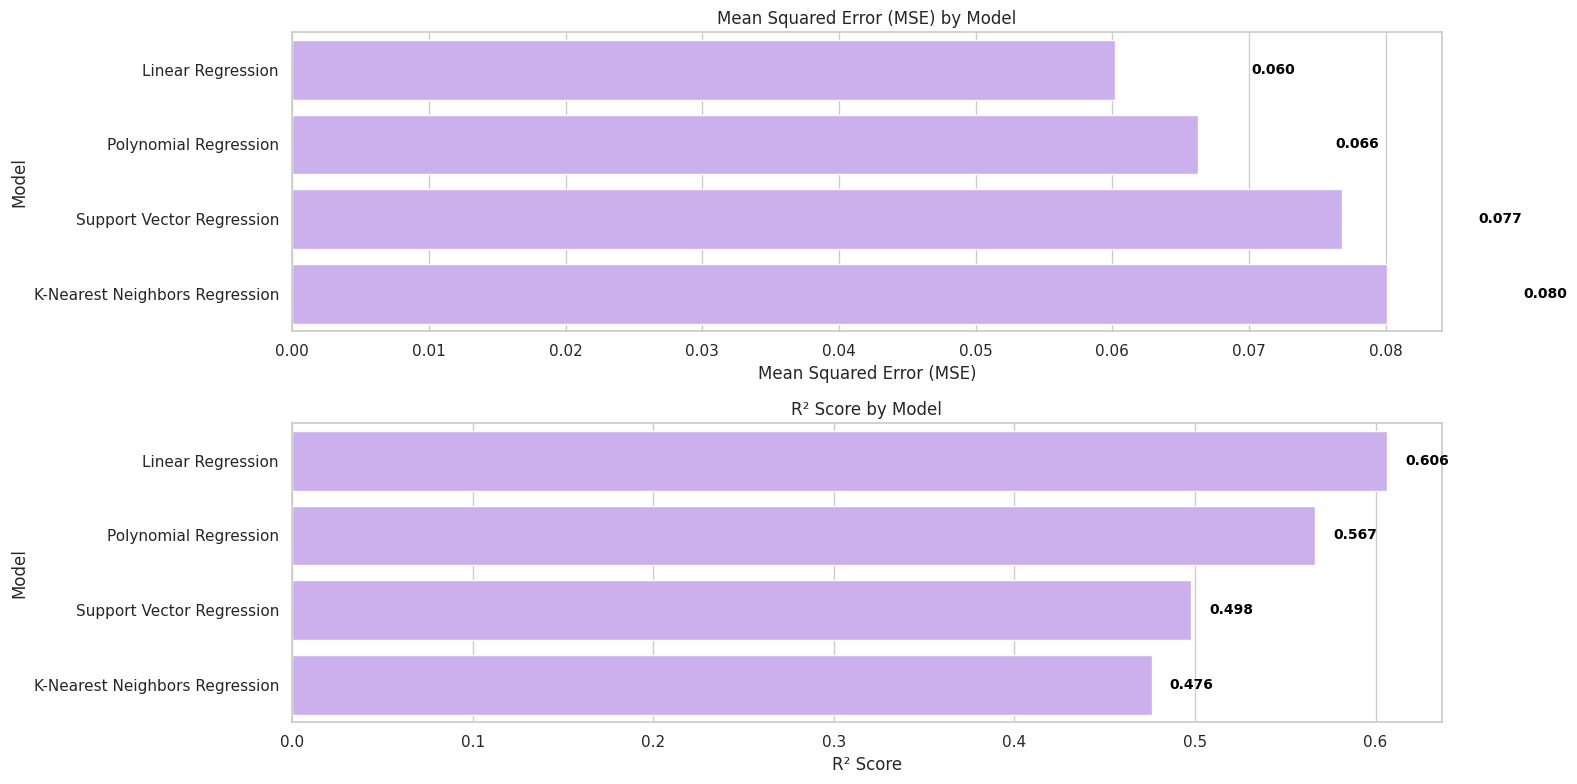

[75.15605493133583, 95.88014981273407, 100.0, 82.77153558052433]
[75.15605493133583, 95.88014981273407, 100.0, 82.77153558052433]
[75.15605493133583, 95.88014981273407, 100.0, 82.77153558052433]
[75.15605493133583, 95.88014981273407, 100.0, 82.77153558052433]


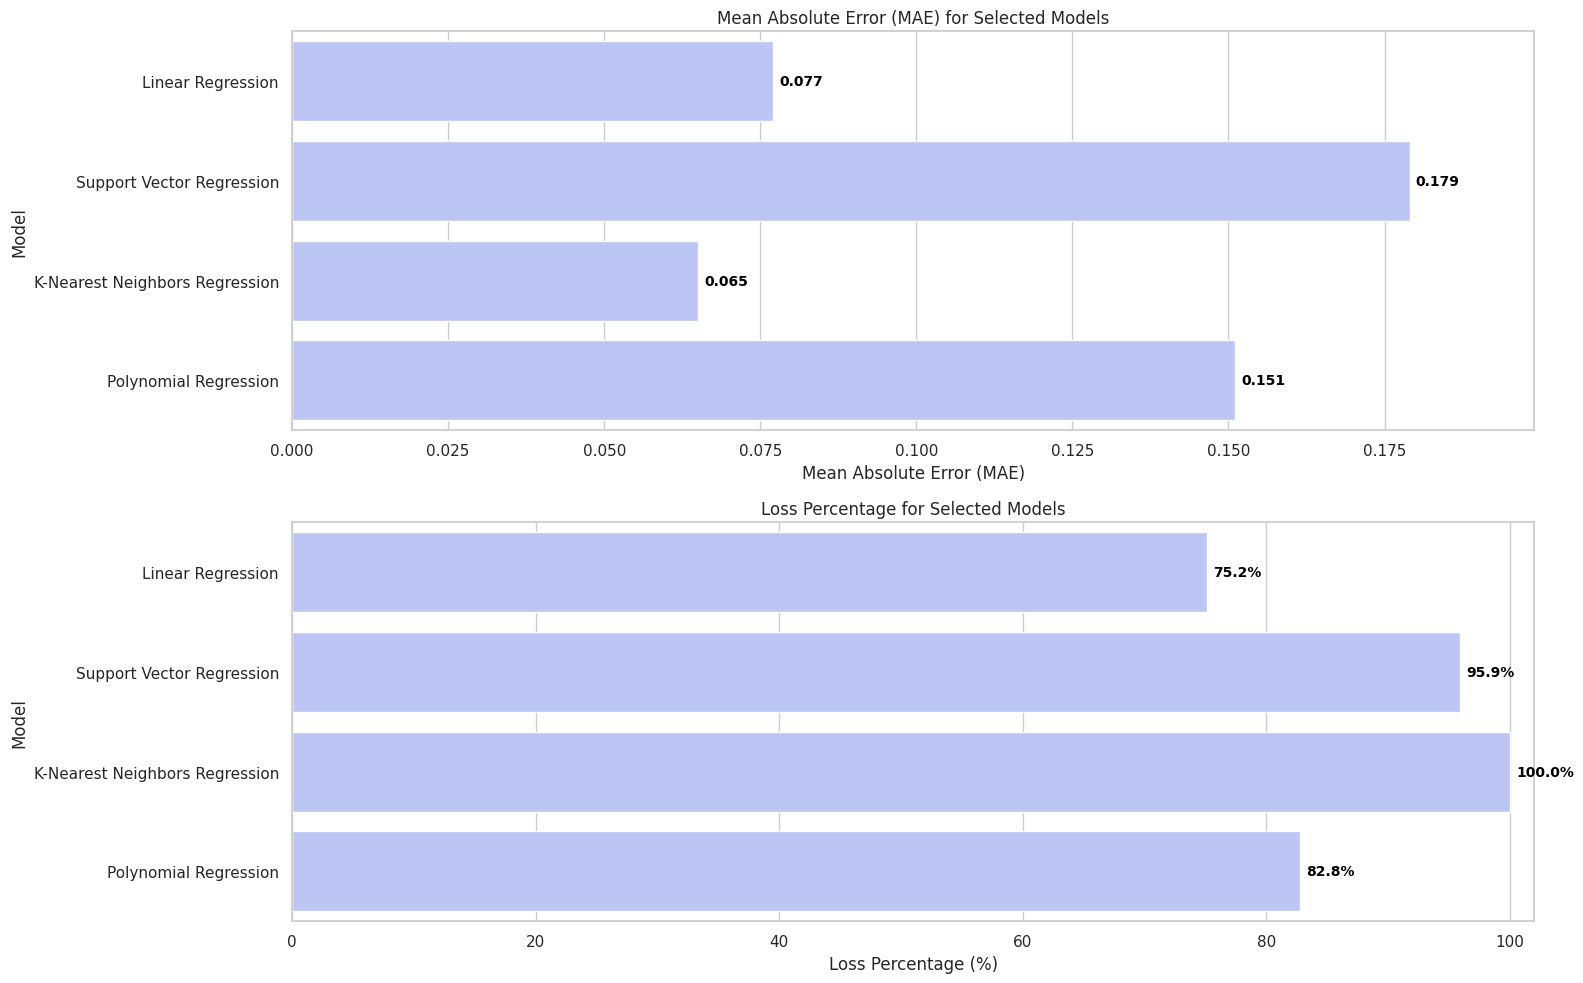

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# metrics for different models
models = [
    'Linear Regression',
    'Support Vector Regression',
    'K-Nearest Neighbors Regression',
    'Polynomial Regression'
]

mse_values = [
    0.0602,         # Linear Regression
    0.0768,         # Support Vector Regression
    0.0801,         # K-Nearest Neighbors Regression
    0.0663          # Polynomial Regression
]

r2_scores = [
    0.6063,         # Linear Regression
    0.4980,         # Support Vector Regression
    0.4759,         # K-Nearest Neighbors Regression
    0.5667          # Polynomial Regression
]

mae_values = [
    0.077,         # Linear Regression
    0.179,         # Support Vector Regression
    0.0650,        # K-Nearest Neighbors Regression
    0.151          # Polynomial Regression
]


df_metrics = pd.DataFrame({
    'Model': models,
    'MSE': mse_values,
    'R² Score': r2_scores
})

top_mse_models = df_metrics.sort_values(by='MSE').head(4)
top_r2_models = df_metrics.sort_values(by='R² Score', ascending=False).head(4)

top_models = pd.concat([top_mse_models, top_r2_models]).drop_duplicates().reset_index(drop=True)

plt.figure(figsize=(16, 8))
sns.set_theme(style="whitegrid")

plt.subplot(2, 1, 1)
barplot_mse = sns.barplot(x='MSE', y='Model', data=top_models, color='#cba6f7')
plt.title('Mean Squared Error (MSE) by Model')
plt.xlabel('Mean Squared Error (MSE)')

for index, row in top_models.iterrows():
    barplot_mse.text(
        row['MSE'] + 0.01, 
        index,
        f'{row["MSE"]:.3f}',
        color='black',
        ha='left',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

plt.subplot(2, 1, 2)
barplot_r2 = sns.barplot(x='R² Score', y='Model', data=top_models, color='#cba6f7')
plt.title('R² Score by Model')
plt.xlabel('R² Score')

for index, row in top_models.iterrows():
    barplot_r2.text(
        row['R² Score'] + 0.01,  
        index,
        f'{row["R² Score"]:.3f}',
        color='black',
        ha='left',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

plt.tight_layout()
plt.show()

# Loss percentage (MSE relative to the maximum observed MSE for normalization)
max_mse = max(mse_values)
loss_percentage = [mse / max_mse * 100 for mse in mse_values]

df_metrics = pd.DataFrame({
    'Model': models,
    'MAE': mae_values,
    'Loss Percentage': loss_percentage
})

selected_models = ['Linear Regression', 'Polynomial Regression', 'Support Vector Regression', 'K-Nearest Neighbors Regression']
filtered_df = df_metrics[df_metrics['Model'].isin(selected_models)]

plt.figure(figsize=(16, 10))  # Increased height for better spacing
sns.set_theme(style="whitegrid")

# MAE Bar Plot
plt.subplot(2, 1, 1)
barplot_mae = sns.barplot(x='MAE', y='Model', data=filtered_df, color='#b4befe')
plt.title('Mean Absolute Error (MAE) for Selected Models')
plt.xlabel('Mean Absolute Error (MAE)')

for p in barplot_mae.patches:
    width = p.get_width()
    plt.text(
        width + 0.001,  
        p.get_y() + p.get_height() / 2,
        f'{width:.3f}',
        color='black',
        ha='left',
        va='center',
        fontsize=10,
        fontweight='bold'
    )

plt.xlim(0, filtered_df['MAE'].max() + 0.02)

plt.subplot(2, 1, 2)
barplot_loss = sns.barplot(x='Loss Percentage', y='Model', data=filtered_df, color='#b4befe')
plt.title('Loss Percentage for Selected Models')
plt.xlabel('Loss Percentage (%)')

for p in barplot_loss.patches:
    width = p.get_width()
    plt.text(
        width + 0.5, 
        p.get_y() + p.get_height() / 2,
        f'{width:.1f}%',
        color='black',
        ha='left',
        va='center',
        fontsize=10,
        fontweight='bold'
    )
    print(loss_percentage)

plt.xlim(0, filtered_df['Loss Percentage'].max() + 2)

plt.subplots_adjust(hspace=0.4)

plt.tight_layout()
plt.show()